<a href="https://colab.research.google.com/github/MrudulaJujjuru/AI_ML/blob/master/nlp/bagofwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Example BOW (Bag of Words) in NLP**

In [3]:
!pip install -q wordcloud
import wordcloud
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

from nltk.corpus import stopwords

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\khyat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khyat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khyat\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\khyat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

# **Step 1: Preprocessing the Text**

*   Converting the text to lowercase
*   Removing non-word characters
*   Removing extra spaces

In [8]:

txt = """Beans. I was trying to explain to somebody as we were flying in, that's corn. That's beans. And they were very impressed..."""
# Tokenize sentences
sentences = nltk.sent_tokenize(txt)
# Process in one pass using list comprehension
for i in range(len(sentences)):
    sentences[i] = sentences[i].lower()
    sentences[i] = re.sub(r'\W', ' ', sentences[i])
    sentences[i] = re.sub(r'\s+', ' ', sentences[i])
# Display results
for i, sentence in enumerate(sentences):
    print(f"Sentence {i+1}: {sentence}")


Sentence 1: beans 
Sentence 2: i was trying to explain to somebody as we were flying in that s corn 
Sentence 3: that s beans 
Sentence 4: and they were very impressed 


In [10]:
# counting
word2count = {}

for data in sentences:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

stop_words = set(stopwords.words('english'))

filtered_word2count = {word: count for word, count in word2count.items() if word not in stop_words}

word_freq_df = pd.DataFrame(list(filtered_word2count.items()), columns=['Word', 'Frequency'])

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

print(word_freq_df)

        Word  Frequency
0      beans          2
1     trying          1
2    explain          1
3   somebody          1
4     flying          1
5       corn          1
6  impressed          1


Top 10 frequent words: ['beans', 'to', 'were', 'that', 's', 'i', 'was', 'trying', 'explain', 'somebody']


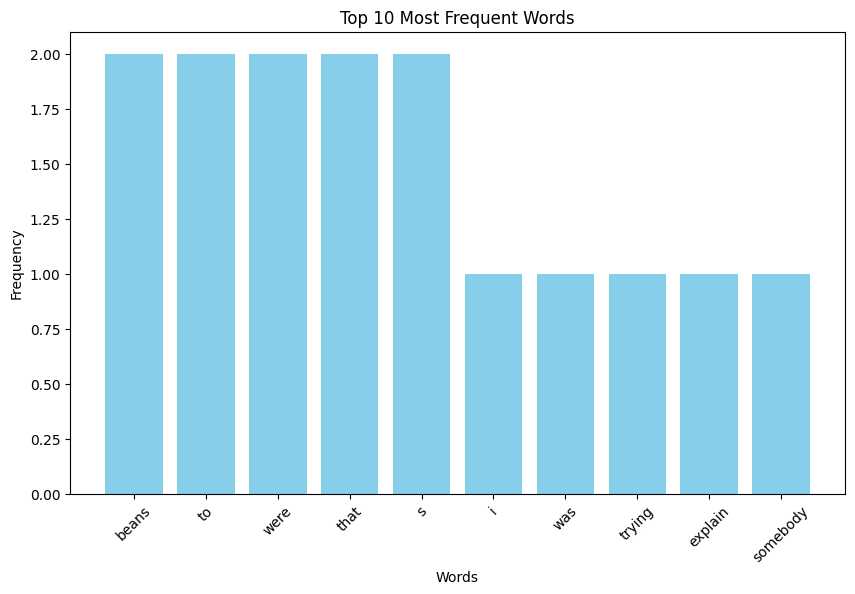

In [11]:
import heapq
import matplotlib.pyplot as plt

freq_words = heapq.nlargest(10, word2count, key=word2count.get)

print(f"Top 10 frequent words: {freq_words}")

top_words = sorted(word2count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

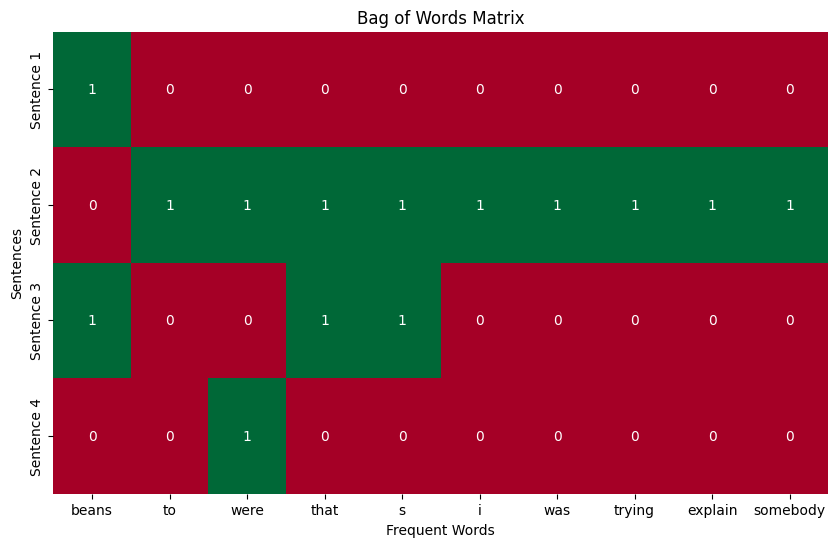

In [17]:
import numpy as np
import seaborn as sns

X = []

for data in sentences:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)

X = np.asarray(X)

plt.figure(figsize=(10, 6))
sns.heatmap(X, cmap='RdYlGn', cbar=False, annot=True, fmt="d", xticklabels=freq_words, yticklabels=[f"Sentence {i+1}" for i in range(len(sentences))])

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Sentences')
plt.show()

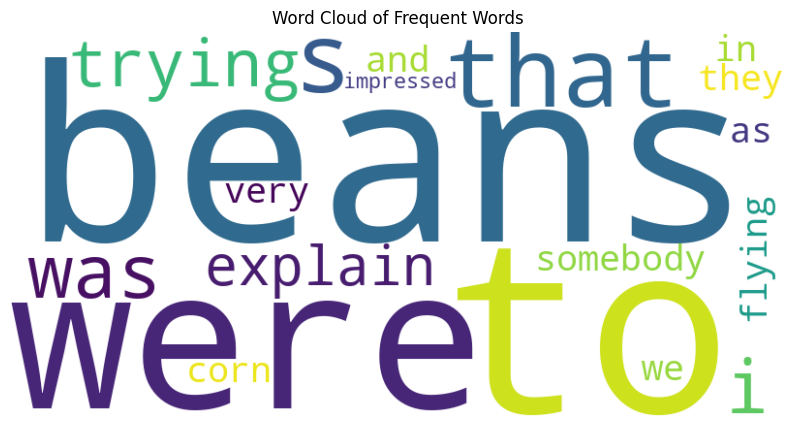

In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word2count)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()